In [1]:
%load_ext autoreload
%autoreload 2

from util import *
from myalgorithm_xgb import algorithm as test1
from myalgorithm import algorithm

In [8]:
import os
import traceback

file_name=  'STAGE1_6.json'

problem_file = os.path.join("stage1_problems", file_name)
# problem_file = os.path.join("alg_test_problems", "TEST_K100_1.json")
timelimit = 30


with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution, bundles, weight = test1(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'
    print(traceback.format_exc())


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Length of BIKE-bundle 1-orders: 300
Length of BIKE-bundle 2-orders: 43692
Length of BIKE-bundle 3-orders: 620613
Length of BIKE-bundle 4-orders: 263472
Length of BIKE-bundle 5-orders: 21451
Length of WALK-bundle 1-orders: 296
Length of WALK-bundle 2-orders: 3758
Length of WALK-bundle 3-orders: 2466
Length of WALK-bundle 4-orders: 22
Length of WALK-bundle 5-orders: 0
Length of CAR-bundle 1-orders: 300
Length of CAR-bundle 2-orders: 31732
Length of CAR-bundle 3-orders: 124035
Length of CAR-bundle 4-orders: 2792
Length of CAR-bundle 5-orders: 54
Traceback (most recent call last):
  File "C:\Users\kks\AppData\Local\Temp\ipykernel_13108\3086295935.py", line 30, in <module>
    solution, bundles, weight = test1(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kks\Documents\GitHub\OGC\myalgorithm_xgb.py", line 305, in algorithm
    solution = solve_with_pulp(all_orders=all_orders,
               ^^^^

{'feasible': False,
 'infeasibility': 'Solution must be a list of bundle information!',
 'bundles': None,
 'time': 541.2341284751892,
 'timelimit_exception': True,
 'exception': 'Pulp: Error while trying to execute, use msg=True for more detailsc:\\Users\\kks\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\pulp\\solverdir\\cbc\\win\\64\\cbc.exe',
 'prob_name': 'STAGE1_6',
 'prob_file': 'stage1_problems\\STAGE1_6.json'}

In [5]:
import json

# for file_name, data in weight_list.items():
with open(os.path.join("weight", f'weight_{file_name}.json'), 'w') as json_file:
    json.dump(weight, json_file, indent=4)  # indent를 사용하여 가독성을 높임

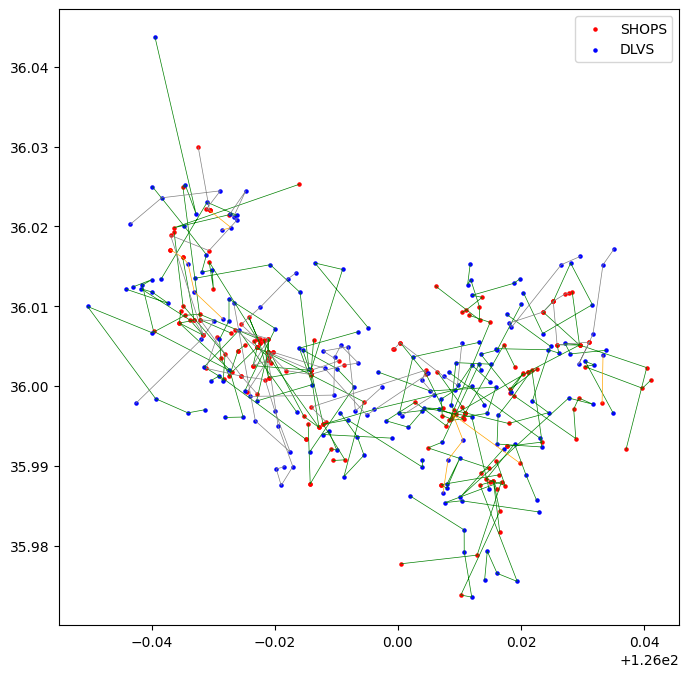

In [18]:
draw_route_solution(ALL_ORDERS, checked_solution)

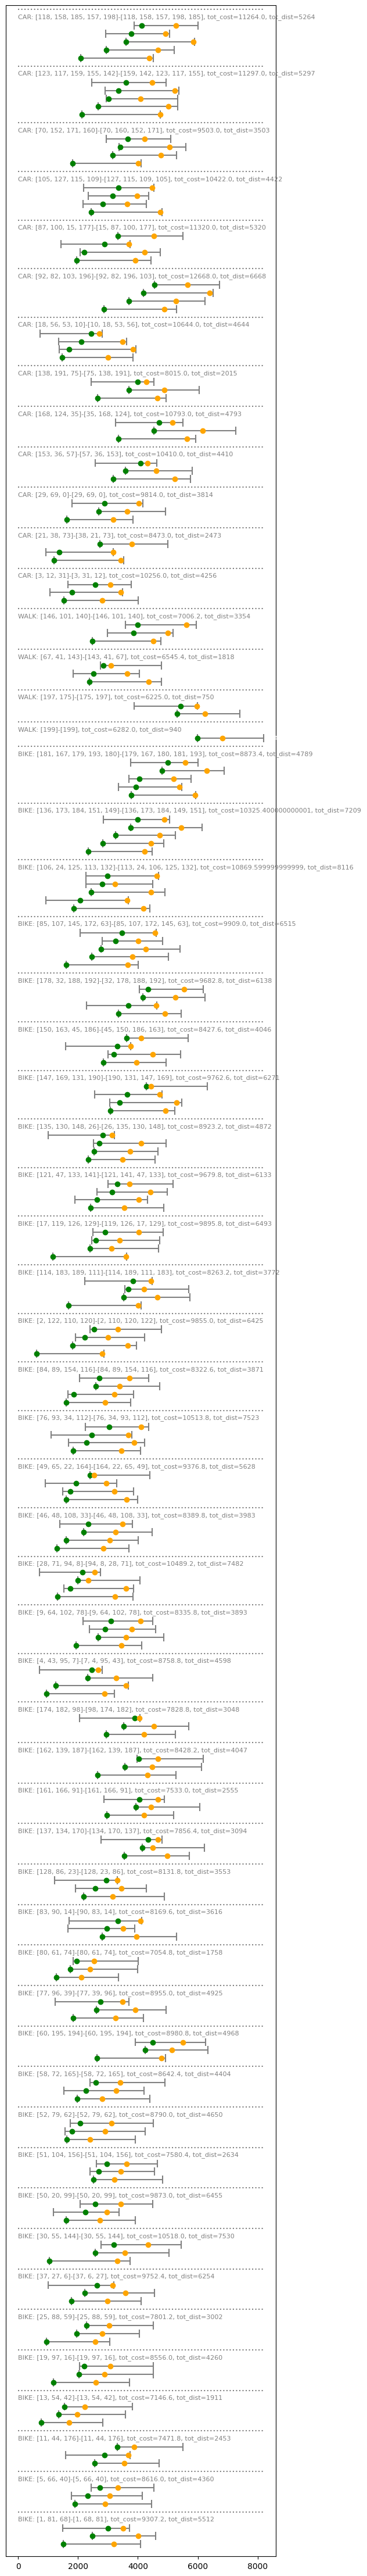

In [19]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)